In [1]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
import numpy as np
import yaml
import imageio.v3 as iio


In [2]:
config_file = './configs/lego.yaml'
with open(config_file, 'r') as file:
    config = yaml.safe_load(file)

In [3]:
from utils.Renderer import Renderer

renderer = Renderer(config['renderer'])

In [4]:
from models.Nerf import Nerf
from utils.Inference import Inference
import yaml
device =  'cuda' if torch.cuda.is_available() else 'cpu'
# device = 'cpu'
print(device)
model_sparse = Nerf(config['model']['L_xyz'],config['model']['L_dir'])
model_sparse.to(device)
model_fine = Nerf(config['model']['L_xyz'],config['model']['L_dir'])
model_fine.to(device)
models = (model_sparse, model_fine)
inferece = Inference(models=models, 
                    checkpoint_path="tinynerf_lego_pt3d28072023234920.pt", 
                    device=device, renderer=renderer)


cuda
9
9
epoch
model_fine_state_dict
model_sparse_state_dict
optimizer_state_dict
train_loss_history
90


In [5]:
from utils.Camera import Camera
test_img = "nerf_synthetic/lego/val/r_0.png"
test_img = iio.imread(test_img)[:,:,:3]
test_img = torch.tensor(test_img)
# test_img = torch.nn.functional.interpolate(test_img[None,...].permute(
#             0, 3, 1, 2), (100, 100), mode='bilinear', align_corners=False).permute(0, 2, 3, 1)[0]
test_img = test_img/255
# get hight and width of image
H, W = test_img.shape[:2]
print(H, W)
focal = .5 * W / np.tan(.5 * 0.6911112070083618)
test_pose = torch.tensor([
                [
                    -0.963964581489563,
                    -0.2611401677131653,
                    0.0507759265601635,
                    0.2046843022108078
                ],
                [
                    0.26603081822395325,
                    -0.9462433457374573,
                    0.18398693203926086,
                    0.7416750192642212
                ],
                [
                    7.450580596923828e-09,
                    0.1908649355173111,
                    0.9816163182258606,
                    3.957021951675415
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    1.0
                ]
            ])
test_camera = Camera(test_img.shape[0], test_img.shape[1], test_pose, focal,device=device)


800 800


torch.Size([800, 800, 3]) torch.Size([800, 800, 3])


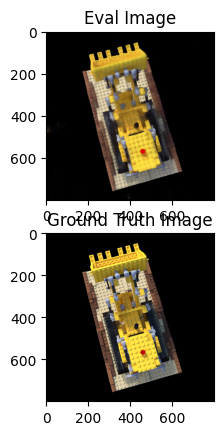

In [6]:
inferece.inference([test_camera], [test_img], plot=True)